# Agrupar en diferentes condiciones

In [1]:
import numpy as np
import pandas as pd

### Por “group by” nos referimos a un proceso que implica uno o más de los siguientes pasos:
#### 1. Splitting los datos en grupos según algunos criterios.
#### 2. Applying una función a cada grupo de forma independiente.
#### 3. Combining los resultados en una estructura de datos.
#### 4. Aggregation: calcular una estadística de resumen (o estadísticas) para cada grupo.
#### 5. Transformation: realizar algunos cálculos específicos del grupo y devolver un objeto indexado similar.
#### 6.  Filtration: descartar algunos grupos, de acuerdo con un cálculo por grupos que evalúa Verdadero o Falso.

In [2]:
# Métodos y funciones de Group By

### gb.agg        gb.boxplot    gb.cummin     gb.describe   gb.filter     
### gb.get_group  gb.height     gb.last       gb.median     gb.ngroups    
### gb.plot       gb.rank       gb.std        gb.transform
### gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      
### gb.groups     gb.hist       gb.max        gb.min        gb.nth        
### gb.prod       gb.resample   gb.sum        gb.var
### gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     
### gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       
### gb.quantile   gb.size       gb.tail       gb.weight

## 1. Dividir un objeto en grupos - df.groupby

In [3]:
# Los objetos pandas se pueden dividir en cualquiera de sus ejes. 
# La definición abstracta de agrupación es proporcionar un mapeo de etiquetas a nombres de grupos
df = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)

In [4]:
df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [5]:
# el eje por defecto es 0
# grouped = df.groupby("class")

In [6]:
#grouped = df.groupby("order", axis="columns")

In [7]:
# grouped = df.groupby(["class", "order"])

In [8]:
# Colectivamente nos referimos a los objetos de agrupación como las "keys"

In [9]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [10]:
df

,A,B,C,D
0,foo,one,-0.626653,-0.531330
1,bar,one,-0.728506,1.300811
2,foo,two,-0.580948,-0.637787
3,bar,three,0.652604,1.466909
4,foo,two,1.321321,0.787860
5,bar,two,0.458967,-0.934768
6,foo,one,0.156572,-1.877455
7,foo,three,-1.631490,-0.970779


### 1.1 Agrupar en un data frame - df.groupby()

In [11]:
# Naturalmente, podríamos agrupar por las columnas A o B, o ambas:
grouped = df.groupby("A")

In [12]:
grouped = df.groupby(["A", "B"])

In [13]:
# Si también tenemos un índice múltiple en las columnas A y B, podemos agrupar por todas menos las columnas especificadas
df2 = df.set_index(["A", "B"])

In [14]:
grouped = df2.groupby(level=df2.index.names.difference(["B"]))

In [15]:
grouped.sum()

,C,D
A,,
bar,0.383065,1.832952
foo,-1.361199,-3.229491


In [16]:
# Estos dividirán el DataFrame en su índice (filas). También podríamos dividir por las columnas:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

In [17]:
grouped = df.groupby(get_letter_type, axis=1)

In [18]:
# Pandas soporta indices duplicados, pero si los indices están duplicados todas las filas se agrupan por ese número/índice
lst = [1, 2, 3, 1, 2, 3]

In [19]:
s = pd.Series([1, 2, 3, 10, 20, 30], lst)

In [20]:
grouped = s.groupby(level=0)

In [21]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [22]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [23]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

### 1.2 Group by Ordenado 

In [24]:
# De forma predeterminada, las claves de grupo se ordenan durante la operación groupby. 
# Sin embargo, puede pasar sort=False para posibles aceleraciones
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})

In [25]:
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [26]:
df2.groupby(["X"]).sum()

,Y
X,
A,7
B,3


In [27]:
df2.groupby(["X"], sort=False).sum()

,Y
X,
B,3
A,7


In [28]:
# Tenga en cuenta que groupby conservará el orden en que se clasifican las observaciones dentro de cada grupo.
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})

In [29]:
df3.groupby(["X"]).get_group("A")

,X,Y
0,A,1
2,A,3


In [30]:
df3.groupby(["X"]).get_group("B")

,X,Y
1,B,4
3,B,2


### 1.3 Group by con dropna

In [31]:
# Por defecto, los valores NA se excluyen de las claves de grupo durante la operación groupby. 
# Sin embargo, en caso de que desee incluir valores NA en las claves de grupo, puede pasar dropna=False para lograrlo.
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]

In [32]:
df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])

In [33]:
df_dropna

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [34]:
# ``dropna`` predeterminado se establece en True, lo que excluirá NaNs en las claves
df_dropna.groupby(by=["b"], dropna=True).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


In [35]:
# Para permitir NaN en las claves, establezca ``dropna`` en False
df_dropna.groupby(by=["b"], dropna=False).sum()

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


### 1.4 GroupBy por atributos de objetos

In [36]:
# El atributo de grupos es un diccionario cuyas claves son los grupos únicos calculados 
# y los valores correspondientes son las etiquetas de los ejes que pertenecen a cada grupo.
df.groupby("A").groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [37]:
df.groupby(get_letter_type, axis=1).groups

{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [38]:
df

,A,B,C,D
0,foo,one,-0.626653,-0.531330
1,bar,one,-0.728506,1.300811
2,foo,two,-0.580948,-0.637787
3,bar,three,0.652604,1.466909
4,foo,two,1.321321,0.787860
5,bar,two,0.458967,-0.934768
6,foo,one,0.156572,-1.877455
7,foo,three,-1.631490,-0.970779


### 1.5 Group By con Multindice

In [39]:
# Con datos indexados jerárquicamente, es bastante natural agrupar por uno de los niveles de la jerarquía.

In [40]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

In [41]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

In [42]:
s = pd.Series(np.random.randn(8), index=index)

In [43]:
s

first  second
bar    one      -0.924159
       two      -0.292718
baz    one       2.783382
       two       2.201255
foo    one       1.404200
       two      -0.046025
qux    one       2.395928
       two       0.383101
dtype: float64

In [44]:
# Entonces podemos agrupar por uno de los niveles en s
grouped = s.groupby(level=0)

In [45]:
grouped.sum()

first
bar   -1.216877
baz    4.984638
foo    1.358175
qux    2.779029
dtype: float64

In [46]:
grouped = s.groupby(level=1)

In [47]:
grouped.sum()

second
one    5.659352
two    2.245614
dtype: float64

In [48]:
# Si el MultiIndex tiene nombres especificados, estos se pueden pasar en lugar del número de nivel
s.groupby(level="second").sum()

second
one    5.659352
two    2.245614
dtype: float64

In [49]:
# Se admite la agrupación con varios niveles.
s.groupby(level=["first", "second"]).sum()

first  second
bar    one      -0.924159
       two      -0.292718
baz    one       2.783382
       two       2.201255
foo    one       1.404200
       two      -0.046025
qux    one       2.395928
       two       0.383101
dtype: float64

In [50]:
# Los nombres de nivel de índice se pueden proporcionar como keys.
s.groupby(["first", "second"]).sum()

first  second
bar    one      -0.924159
       two      -0.292718
baz    one       2.783382
       two       2.201255
foo    one       1.404200
       two      -0.046025
qux    one       2.395928
       two       0.383101
dtype: float64

### 1.6 Agrupación de DataFrame con niveles y columnas de índice

In [51]:
# Un DataFrame se puede agrupar por una combinación de columnas y niveles de índice especificando 
# los nombres de columna como cadenas y los niveles de índice como objetos pd.Grouper.
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

In [52]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

In [53]:
df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)}, index=index)

In [54]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [55]:
# El siguiente ejemplo agrupa df por el segundo nivel de índice y la columna A.
df.groupby([pd.Grouper(level=1), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [56]:
# Los niveles de índice también se pueden especificar por nombre.
df.groupby([pd.Grouper(level="first"), "A"]).sum()

,,B
first,A,
bar,1,1
baz,1,5
foo,2,9
qux,3,13


In [57]:
# Los nombres de nivel de índice se pueden especificar como keys directamente para groupby.
df.groupby(["second", "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

### 1.7 Selección de columna DataFrame en GroupBy con corchetes [ ]

In [58]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [59]:
df

,A,B,C,D
0,foo,one,0.949197,-1.380265
1,bar,one,-0.475393,-0.094057
2,foo,two,-0.267266,-2.365419
3,bar,three,0.655546,-1.040528
4,foo,two,2.344164,0.100259
5,bar,two,0.374098,0.995891
6,foo,one,0.647074,0.094996
7,foo,three,-1.135064,-0.157511


In [60]:
grouped = df.groupby(["A"])

In [61]:
grouped_C = grouped["C"]

In [62]:
grouped_D = grouped["D"]

In [63]:
grouped["D"].sum()

A
bar   -0.138694
foo   -3.707940
Name: D, dtype: float64

## 2. Iterar a través de los grupos - bucle "for"

In [64]:
grouped = df.groupby('A')

In [65]:
for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one -0.475393 -0.094057
3  bar  three  0.655546 -1.040528
5  bar    two  0.374098  0.995891
foo
     A      B         C         D
0  foo    one  0.949197 -1.380265
2  foo    two -0.267266 -2.365419
4  foo    two  2.344164  0.100259
6  foo    one  0.647074  0.094996
7  foo  three -1.135064 -0.157511


In [66]:
# En el caso de agrupar por varias claves, el nombre del grupo será una tupla
for name, group in df.groupby(['A', 'B']):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one -0.475393 -0.094057
('bar', 'three')
     A      B         C         D
3  bar  three  0.655546 -1.040528
('bar', 'two')
     A    B         C         D
5  bar  two  0.374098  0.995891
('foo', 'one')
     A    B         C         D
0  foo  one  0.949197 -1.380265
6  foo  one  0.647074  0.094996
('foo', 'three')
     A      B         C         D
7  foo  three -1.135064 -0.157511
('foo', 'two')
     A    B         C         D
2  foo  two -0.267266 -2.365419
4  foo  two  2.344164  0.100259


## 3. Seleccionar un grupo - get_group()

In [67]:
grouped.get_group("bar")

,A,B,C,D
1,bar,one,-0.475393,-0.094057
3,bar,three,0.655546,-1.040528
5,bar,two,0.374098,0.995891


In [68]:
# O para un objeto agrupado en varias columnas
df.groupby(["A", "B"]).get_group(("bar", "one"))

,A,B,C,D
1,bar,one,-0.475393,-0.094057


## 4. Agregaciones - aggregate() o agg() 

In [69]:
# Métodos más comunes de agregación

# mean()       Compute mean of groups
# sum()        Compute sum of group values
# size()       Compute group sizes
# count()      Compute count of group
# std()        Standard deviation of groups
# var()        Compute variance of groups
# sem()        Standard error of the mean of groups
# describe()   Generates descriptive statistics
# first()      Compute first of group values
# last()       Compute last of group values
# nth()        Take nth value, or a subset if n is a list
# min()        Compute min of group values
# max()        Compute max of group values

In [70]:
grouped = df.groupby("A")

In [71]:
grouped[["C", "D"]].aggregate(np.sum)

,C,D
A,,
bar,0.554251,-0.138694
foo,2.538106,-3.707940


In [72]:
grouped = df.groupby(["A", "B"])

In [73]:
grouped.aggregate(np.sum)

C         D
A   B                        
bar one   -0.475393 -0.094057
    three  0.655546 -1.040528
    two    0.374098  0.995891
foo one    1.596272 -1.285269
    three -1.135064 -0.157511
    two    2.076898 -2.265160

In [74]:
# En el caso de varias claves, el resultado es un índice múltiple por defecto, 
# aunque esto se puede cambiar usando la opción as_index
grouped = df.groupby(["A", "B"], as_index=False)

In [75]:
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,-0.475393,-0.094057
1,bar,three,0.655546,-1.040528
2,bar,two,0.374098,0.995891
3,foo,one,1.596272,-1.285269
4,foo,three,-1.135064,-0.157511
5,foo,two,2.076898,-2.265160


In [76]:
df.groupby("A", as_index=False)[["C", "D"]].sum()

,A,C,D
0,bar,0.554251,-0.138694
1,foo,2.538106,-3.707940


In [77]:
# Tenga en cuenta que podría usar la función reset_index DataFrame para lograr el mismo resultado 
# ya que los nombres de las columnas se almacenan en el MultiIndex resultante
df.groupby(["A", "B"]).sum().reset_index()

,A,B,C,D
0,bar,one,-0.475393,-0.094057
1,bar,three,0.655546,-1.040528
2,bar,two,0.374098,0.995891
3,foo,one,1.596272,-1.285269
4,foo,three,-1.135064,-0.157511
5,foo,two,2.076898,-2.265160


In [78]:
# Otro ejemplo de agregación simple es calcular el tamaño de cada grupo. Esto se incluye en GroupBy 
# como el método de tamaño. Devuelve una Serie cuyo índice son los nombres de los grupos y 
# cuyos valores son los tamaños de cada grupo.
grouped.size()

,A,B,size
0,bar,one,1
1,bar,three,1
2,bar,two,1
3,foo,one,2
4,foo,three,1
5,foo,two,2


In [79]:
# También podemos aplicar el método describe() a los grupos
grouped.describe()

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0 -0.475393       NaN -0.475393 -0.475393 -0.475393 -0.475393 -0.475393   
1   1.0  0.655546       NaN  0.655546  0.655546  0.655546  0.655546  0.655546   
2   1.0  0.374098       NaN  0.374098  0.374098  0.374098  0.374098  0.374098   
3   2.0  0.798136  0.213633  0.647074  0.722605  0.798136  0.873667  0.949197   
4   1.0 -1.135064       NaN -1.135064 -1.135064 -1.135064 -1.135064 -1.135064   
5   2.0  1.038449  1.846560 -0.267266  0.385591  1.038449  1.691307  2.344164   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0 -0.094057       NaN -0.094057 -0.094057 -0.094057 -0.094057 -0.094057  
1   1.0 -1.040528       NaN -1.040528 -1.040528 -1.040528 -1.040528 -1.040528  
2   1.0  0.995891       NaN  0.995891  0.995891  0.995891  0.995891  0.995891  
3   2.0 -0.642635  1.043167 -1.380265 -1.011450 -0.642635 -0.273819  0.094996  
4   1.0 -0.157511       NaN -0.157511 -0.157511 -0.157511 -0.157511 -0.157511  
5   2.0 -1.132580  1.743498 -2.365419 -1.749000 -1.132580 -0.516160  0.100259

In [80]:
# Otro ejemplo de agregación es calcular el número de valores únicos de cada grupo. 
# Esto es similar a la función value_counts, excepto que solo cuenta valores únicos
ll = [['foo', 1], ['foo', 2], ['foo', 2], ['bar', 1], ['bar', 1]]

In [81]:
df4 = pd.DataFrame(ll, columns=["A", "B"])

In [82]:
df4

,A,B
0,foo,1
1,foo,2
2,foo,2
3,bar,1
4,bar,1


In [83]:
df4.groupby("A")["B"].nunique()

A
bar    1
foo    2
Name: B, dtype: int64

### 4.1 Aplicar varias funciones a la vez

In [84]:
# Con Series agrupadas, también puede pasar una lista o diccionario de funciones para hacer agregaciones, generando un DataFrame
grouped = df.groupby("A")

In [85]:
grouped["C"].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,0.554251,0.184750,0.588766
foo,2.538106,0.507621,1.312078


In [86]:
# En un DataFrame agrupado, puede pasar una lista de funciones para aplicar a cada columna, 
# lo que produce un resultado agregado con un índice jerárquico
grouped[["C", "D"]].agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  0.554251  0.184750  0.588766 -0.138694 -0.046231  1.019051
foo  2.538106  0.507621  1.312078 -3.707940 -0.741588  1.094813

In [87]:
# Las agregaciones resultantes reciben el nombre de las propias funciones. 
# Si necesita cambiar el nombre, puede agregar una operación encadenada para una serie como esta:
(
    grouped["C"]
    .agg([np.sum, np.mean, np.std])
    .rename(columns={"sum": "suma", "mean": "media", "std": "desviacion"})
)

,suma,media,desviacion
A,,,
bar,0.554251,0.184750,0.588766
foo,2.538106,0.507621,1.312078


In [88]:
# Para un DataFrame agrupado, puede cambiar el nombre de manera similar
(
    grouped[["C", "D"]].agg([np.sum, np.mean, np.std]).rename(
        columns={"sum": "suma", "mean": "media", "std": "desviacion"}
    )
)

C                              D                     
         suma     media desviacion      suma     media desviacion
A                                                                
bar  0.554251  0.184750   0.588766 -0.138694 -0.046231   1.019051
foo  2.538106  0.507621   1.312078 -3.707940 -0.741588   1.094813

### 4.2 Agregación con nombre - pd.NamedAgg

In [89]:
# Para admitir la agregación específica de columnas con control sobre los nombres de las columnas de salida, 
# pandas acepta la sintaxis especial en GroupBy.agg(), conocida como "agregación con nombre"
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)

In [90]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [91]:
# Aplicaremos las funciones solo a la columna "kind"
animals.groupby("kind").agg(
    min_height=pd.NamedAgg(column="height", aggfunc="min"),
    max_height=pd.NamedAgg(column="height", aggfunc="max"),
    average_weight=pd.NamedAgg(column="weight", aggfunc=np.mean),
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [92]:
# pandas.NamedAgg es solo una tupla con nombre. También se permiten tuplas simples.
animals.groupby("kind").agg(
    min_height=("height", "min"),
    max_height=("height", "max"),
    average_weight=("weight", np.mean),
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [93]:
# La agregación con nombre también es válida para las agregaciones de series agrupadas. 
# En este caso no hay selección de columnas, por lo que los valores son solo las funciones
animals.groupby("kind").height.agg(
    min_height="min",
    max_height="max",
)

,min_height,max_height
kind,,
cat,9.1,9.5
dog,6.0,34.0


### 4.3 Aplicar diferentes funciones a las columnas de DataFrame

In [94]:
# Al pasar un diccionario para agreggate, puede aplicar una agregación diferente a las columnas de un DataFrame
grouped.agg({"C": np.sum, "D": lambda x: np.std(x, ddof=1)})

,C,D
A,,
bar,0.554251,1.019051
foo,2.538106,1.094813


In [95]:
grouped.agg({"C": "sum", "D": "std"})

,C,D
A,,
bar,0.554251,1.019051
foo,2.538106,1.094813


### 4.4 Agregaciones con funciones definidas por el usuario

In [96]:
animals.groupby("kind")[["height"]].agg(lambda x: set(x))

,height
kind,
cat,"{9.1, 9.5}"
dog,"{34.0, 6.0}"


In [97]:
animals.groupby("kind")[["height"]].agg(lambda x: x.astype(int).sum())

,height
kind,
cat,18
dog,40


## 5. Transformaciones 

In [98]:
# El método de transformación devuelve un objeto que está indexado igual que el que se está agrupando.
# Supongamos que deseamos estandarizar los datos dentro de cada grupo:
index = pd.date_range("10/1/1999", periods=1100)

In [99]:
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)

In [100]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()

In [101]:
ts.head()

2000-01-08    0.927900
2000-01-09    0.927309
2000-01-10    0.920515
2000-01-11    0.882639
2000-01-12    0.864401
Freq: D, dtype: float64

In [102]:
ts.tail()

2002-09-30    0.394516
2002-10-01    0.399418
2002-10-02    0.405375
2002-10-03    0.338155
2002-10-04    0.344638
Freq: D, dtype: float64

In [103]:
transformed = ts.groupby(lambda x: x.year).transform(
    lambda x: (x - x.mean()) / x.std()
)

In [104]:
# Original Data
grouped = ts.groupby(lambda x: x.year)

In [105]:
grouped.mean()

2000    0.537574
2001    0.376734
2002    0.469666
dtype: float64

In [106]:
grouped.std()

2000    0.179927
2001    0.140576
2002    0.110933
dtype: float64

In [107]:
# Transformed Data
grouped_trans = transformed.groupby(lambda x: x.year)

In [108]:
grouped_trans.mean()

2000   -1.078679e-15
2001    2.340289e-15
2002    1.092588e-15
dtype: float64

In [109]:
grouped_trans.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

In [110]:
compare = pd.DataFrame({"Original": ts, "Transformed": transformed})

<AxesSubplot:>

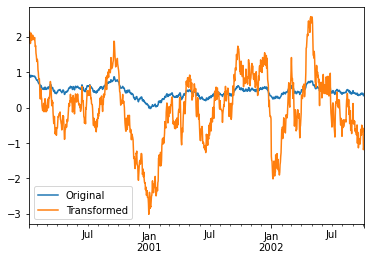

In [111]:
compare.plot()

In [112]:
max_ts = ts.groupby(lambda x: x.year).transform("max")

In [113]:
min_ts = ts.groupby(lambda x: x.year).transform("min")

In [114]:
# Calculos con data transformada
max_ts - min_ts

2000-01-08    0.932656
2000-01-09    0.932656
2000-01-10    0.932656
2000-01-11    0.932656
2000-01-12    0.932656
                ...   
2002-09-30    0.509053
2002-10-01    0.509053
2002-10-02    0.509053
2002-10-03    0.509053
2002-10-04    0.509053
Freq: D, Length: 1001, dtype: float64

### 5.1 Operaciones de ventana y remuestreo - resample(), expand() y rolling()

In [115]:
# Es posible usar resample(), expand() y rolling() como métodos en groupbys.
df_re = pd.DataFrame({"A": [1] * 10 + [5] * 10, "B": np.arange(20)})

In [116]:
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [117]:
df_re.groupby("A").rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [118]:
# El método de expanding() acumulará una operación dada (sum() en el ejemplo) 
# para todos los miembros de cada grupo en particular.
df_re.groupby("A").expanding().sum()

B
A          
1 0     0.0
  1     1.0
  2     3.0
  3     6.0
  4    10.0
  5    15.0
  6    21.0
  7    28.0
  8    36.0
  9    45.0
5 10   10.0
  11   21.0
  12   33.0
  13   46.0
  14   60.0
  15   75.0
  16   91.0
  17  108.0
  18  126.0
  19  145.0

In [119]:
# Suponga que desea utilizar el método resample() para obtener una frecuencia diaria en cada grupo de su marco de datos 
# y desea completar los valores faltantes con el método ffill()
df_re = pd.DataFrame(
    {
        "date": pd.date_range(start="2016-01-01", periods=4, freq="W"),
        "group": [1, 1, 2, 2],
        "val": [5, 6, 7, 8],
    }
).set_index("date")

In [120]:
df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [121]:
df_re.groupby("group").resample("1D").ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      1    5
      2016-01-05      1    5
      2016-01-06      1    5
      2016-01-07      1    5
      2016-01-08      1    5
      2016-01-09      1    5
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      2    7
      2016-01-19      2    7
      2016-01-20      2    7
      2016-01-21      2    7
      2016-01-22      2    7
      2016-01-23      2    7
      2016-01-24      2    8

## 6. Filtros con funciones lambda

In [122]:
# El método de filter devuelve un subconjunto del objeto original. Supongamos que queremos tomar 
# solo elementos que pertenecen a grupos con una suma de grupo mayor que 2.
sf = pd.Series([1, 1, 2, 3, 3, 3])

In [123]:
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

In [124]:
# Otra operación útil es filtrar elementos que pertenecen a grupos con solo un par de miembros.
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})

In [125]:
dff.groupby("B").filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [126]:
# Alternativamente, en lugar de descartar los grupos ofensivos, podemos devolver objetos indexados 
# similares donde los grupos que no pasan el filtro se llenan con NaN.
dff.groupby("B").filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [127]:
# Para DataFrames con varias columnas, los filtros deben especificar explícitamente una columna como criterio de filtro.
dff["C"] = np.arange(8)

In [128]:
dff.groupby("B").filter(lambda x: len(x["C"]) > 2)

,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5


## 7. Instanciar métodos con funciones lambda

In [129]:
grouped = df.groupby("A")

In [130]:
grouped.agg(lambda x: x.std())

C:\Users\equipo\AppData\Local\Temp\ipykernel_11564\862923509.py:1: FutureWarning: ['B'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(lambda x: x.std())


,C,D
A,,
bar,0.588766,1.019051
foo,1.312078,1.094813


In [131]:
grouped.std()

,C,D
A,,
bar,0.588766,1.019051
foo,1.312078,1.094813


In [132]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3),
    index=pd.date_range("1/1/2000", periods=1000),
    columns=["A", "B", "C"],
)

In [133]:
tsdf.iloc[::2] = np.nan

In [134]:
grouped = tsdf.groupby(lambda x: x.year)

In [135]:
grouped.fillna(method="pad")

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,-1.469657,1.187166,0.154226
2000-01-03,-1.469657,1.187166,0.154226
2000-01-04,0.673749,0.015117,0.857307
2000-01-05,0.673749,0.015117,0.857307
...,...,...,...
2002-09-22,1.271493,-1.084330,0.543908
2002-09-23,1.271493,-1.084330,0.543908
2002-09-24,1.818274,-0.296370,0.150696
2002-09-25,1.818274,-0.296370,0.150696


In [136]:
# Los métodos nlargest y nsmallest funcionan en grupos de estilo Series
s = pd.Series([9, 8, 7, 5, 19, 1, 4.2, 3.3])

In [137]:
g = pd.Series(list("abababab"))

In [138]:
gb = s.groupby(g)

In [139]:
gb.nlargest(3)

a  4    19.0
   0     9.0
   2     7.0
b  1     8.0
   3     5.0
   7     3.3
dtype: float64

In [140]:
gb.nsmallest(3)

a  6    4.2
   2    7.0
   0    9.0
b  5    1.0
   7    3.3
   3    5.0
dtype: float64

## 8. Flexible apply

In [141]:
# apply puede actuar como una función reductora, transformadora o de filtro, dependiendo exactamente de lo que se le pase. 
# Puede depender de la función pasada y exactamente de lo que está agrupando. Por lo tanto, la(s) columna(s) 
# agrupada(s) puede(n) incluirse en la salida, así como establecer los índices.
df

,A,B,C,D
0,foo,one,0.949197,-1.380265
1,bar,one,-0.475393,-0.094057
2,foo,two,-0.267266,-2.365419
3,bar,three,0.655546,-1.040528
4,foo,two,2.344164,0.100259
5,bar,two,0.374098,0.995891
6,foo,one,0.647074,0.094996
7,foo,three,-1.135064,-0.157511


In [142]:
grouped = df.groupby("A")

In [143]:
# could also just call .describe()
grouped["C"].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean     0.184750
     std      0.588766
     min     -0.475393
     25%     -0.050647
     50%      0.374098
     75%      0.514822
     max      0.655546
foo  count    5.000000
     mean     0.507621
     std      1.312078
     min     -1.135064
     25%     -0.267266
     50%      0.647074
     75%      0.949197
     max      2.344164
Name: C, dtype: float64

In [144]:
# La dimensión del resultado devuelto también puede cambiar
grouped = df.groupby('A')['C']

In [145]:
def f(group):
    return pd.DataFrame({'original': group,
                         'demeaned': group - group.mean()})

In [146]:
# Para controlar si las columnas agrupadas se incluyen en los índices, puede usar el argumento group_keys.
df.groupby("A", group_keys=True).apply(lambda x: x)

,A,B,C,D
0,foo,one,0.949197,-1.380265
1,bar,one,-0.475393,-0.094057
2,foo,two,-0.267266,-2.365419
3,bar,three,0.655546,-1.040528
4,foo,two,2.344164,0.100259
5,bar,two,0.374098,0.995891
6,foo,one,0.647074,0.094996
7,foo,three,-1.135064,-0.157511


In [147]:
# Si utilizamos "group_keys = False" se eliminan los índices
df.groupby("A", group_keys=False).apply(lambda x: x)

,A,B,C,D
0,foo,one,0.949197,-1.380265
1,bar,one,-0.475393,-0.094057
2,foo,two,-0.267266,-2.365419
3,bar,three,0.655546,-1.040528
4,foo,two,2.344164,0.100259
5,bar,two,0.374098,0.995891
6,foo,one,0.647074,0.094996
7,foo,three,-1.135064,-0.157511


## 9. Otras funciones útiles

### 9.1 Exclusión automática de columnas "molestas"

In [148]:
df

,A,B,C,D
0,foo,one,0.949197,-1.380265
1,bar,one,-0.475393,-0.094057
2,foo,two,-0.267266,-2.365419
3,bar,three,0.655546,-1.040528
4,foo,two,2.344164,0.100259
5,bar,two,0.374098,0.995891
6,foo,one,0.647074,0.094996
7,foo,three,-1.135064,-0.157511


In [150]:
# Podemos hacer calculos de una sola columna y omitir las otras, utlizando numeric_only=True
# df.groupby("A").std(numeric_only=True)

### 9.2 Agrupar con factores ordenados

In [151]:
# Las variables categóricas representadas como instancias de la clase categórica de pandas se pueden usar 
# como claves de grupo. Si es así, se conservará el orden de los niveles.
data = pd.Series(np.random.randn(100))

In [152]:
factor = pd.qcut(data, [0, 0.25, 0.5, 0.75, 1.0])

In [153]:
data.groupby(factor).mean()

(-1.7519999999999998, -0.623]   -1.101360
(-0.623, 0.0484]                -0.287289
(0.0484, 0.592]                  0.337468
(0.592, 2.352]                   1.143768
dtype: float64

### 9.3 Agrupación con una especificación de agrupador

In [154]:
# Es posible que deba especificar un poco más de datos para agrupar correctamente. 
# Puede utilizar pd.Grouper para proporcionar este control local.
import datetime

In [155]:
df = pd.DataFrame(
    {
        "Branch": "A A A A A A A B".split(),
        "Buyer": "Carl Mark Carl Carl Joe Joe Joe Carl".split(),
        "Quantity": [1, 3, 5, 1, 8, 1, 9, 3],
        "Date": [
            datetime.datetime(2013, 1, 1, 13, 0),
            datetime.datetime(2013, 1, 1, 13, 5),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 12, 2, 12, 0),
            datetime.datetime(2013, 12, 2, 14, 0),
        ],
    }
)

In [156]:
df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,2013-01-01 13:00:00
1,A,Mark,3,2013-01-01 13:05:00
2,A,Carl,5,2013-10-01 20:00:00
3,A,Carl,1,2013-10-02 10:00:00
4,A,Joe,8,2013-10-01 20:00:00
5,A,Joe,1,2013-10-02 10:00:00
6,A,Joe,9,2013-12-02 12:00:00
7,B,Carl,3,2013-12-02 14:00:00


In [157]:
# Agrupar por una columna específica con la frecuencia deseada. Esto es como volver a muestrear.
df.groupby([pd.Grouper(freq="1M", key="Date"), "Buyer"])[["Quantity"]].sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [158]:
# Tiene una especificación ambigua en el sentido de que tiene un índice con nombre y 
# una columna que podrían ser agrupadores potenciales.
df = df.set_index("Date")

In [159]:
df["Date"] = df.index + pd.offsets.MonthEnd(2)

In [160]:
df.groupby([pd.Grouper(freq="6M", key="Date"), "Buyer"])[["Quantity"]].sum()

Quantity
Date       Buyer          
2013-02-28 Carl          1
           Mark          3
2014-02-28 Carl          9
           Joe          18

In [161]:
df.groupby([pd.Grouper(freq="6M", level="Date"), "Buyer"])[["Quantity"]].sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2014-01-31 Carl          9
           Joe          18

### 9.4 Tomando las primeras filas de cada grupo

In [162]:
# Al igual que para un DataFrame o Series, puede llamar head() y tail() en un grupo por
df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=["A", "B"])

In [163]:
df

,A,B
0,1,2
1,1,4
2,5,6


In [164]:
g = df.groupby("A")

In [166]:
g.head(1)

,A,B
0,1,2
2,5,6


In [167]:
g.tail(1)

,A,B
1,1,4
2,5,6


### 9.5 Tomando la enésima fila de cada grupo

In [168]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=["A", "B"])

In [169]:
g = df.groupby("A")

In [170]:
g.nth(0)

,B
A,
1,NaN
5,6.0


In [171]:
g.nth(-1)

,B
A,
1,4.0
5,6.0


In [172]:
g.nth(1)

,B
A,
1,4.0


In [173]:
# Al igual que con otros métodos, pasar as_index=False logrará una filtración, que devuelve la fila agrupada
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=["A", "B"])

In [174]:
g = df.groupby("A", as_index=False)

In [175]:
g.nth(0)

,A,B
0,1,NaN
2,5,6.0


In [176]:
g.nth(-1)

,A,B
1,1,4.0
2,5,6.0


In [177]:
# También puede seleccionar varias filas de cada grupo especificando varios valores enésimos como una lista de números enteros.
business_dates = pd.date_range(start="4/1/2014", end="6/30/2014", freq="B")

In [178]:
df = pd.DataFrame(1, index=business_dates, columns=["a", "b"])

In [179]:
df.groupby([df.index.year, df.index.month]).nth([0, 3, -1])

a  b
2014 4  1  1
     4  1  1
     4  1  1
     5  1  1
     5  1  1
     5  1  1
     6  1  1
     6  1  1
     6  1  1

### 9.6 Enumerar elementos de grupo

In [180]:
# Para ver el orden en que aparece cada fila dentro de su grupo, utilice el método cumcount()
dfg = pd.DataFrame(list("aaabba"), columns=["A"])

In [181]:
dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [182]:
dfg.groupby("A").cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [183]:
dfg.groupby("A").cumcount(ascending=False)

0    3
1    2
2    1
3    1
4    0
5    0
dtype: int64

### 9.7 Enumerar grupos

In [184]:
# Para ver el orden de los grupos (a diferencia del orden de 
# las filas dentro de un grupo dado por cumcount), puede usar ngroup().
dfg = pd.DataFrame(list("aaabba"), columns=["A"])

In [185]:
dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [186]:
dfg.groupby("A").ngroup()

0    0
1    0
2    0
3    1
4    1
5    0
dtype: int64

In [187]:
dfg.groupby("A").ngroup(ascending=False)

0    1
1    1
2    1
3    0
4    0
5    1
dtype: int64

### 9.8 Graficar - Plotting

In [188]:
np.random.seed(1234)

In [189]:
df = pd.DataFrame(np.random.randn(50, 2))

In [190]:
df["g"] = np.random.choice(["A", "B"], size=50)

In [191]:
df.loc[df["g"] == "B", 1] += 3

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

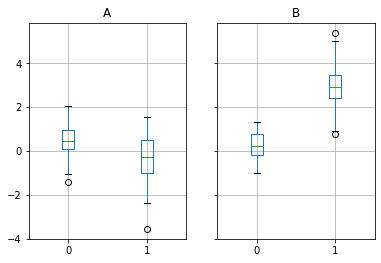

In [192]:
df.groupby("g").boxplot()